# (Ford GoBike System Data)
## by (Elias Sadeeq)

## Investigation Overview
>In this investagition I will try to provide the needed vizulaes betwewn some intersting variables to see there impcat on other variables sich as the Duration of the trip.

## Dataset Overview
>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

In [2]:
df = pd.read_csv('fordgobike-tripdata_clean.csv')

### The most frequent trip duration
- Distrubition is skewed
- most values are between 250 and 3000.
- the most right values I would not consider them as outliers yet.


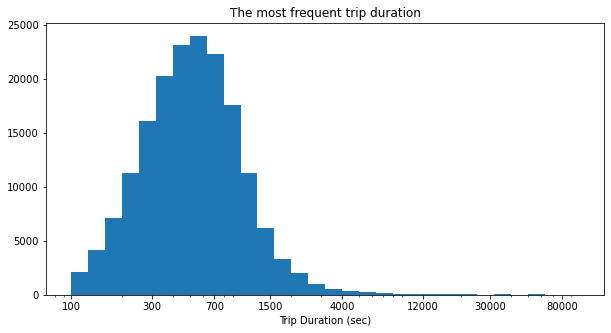

In [3]:
# duration.
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (sec)')
plt.title('The most frequent trip duration')
plt.show();

### Exploring the days variable.
weekdays has way more trips than the weekends, as expected.

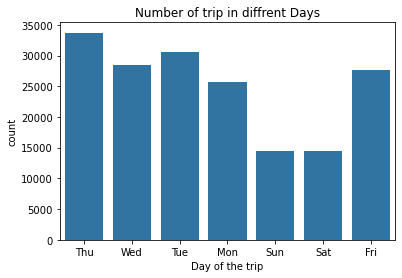

In [4]:
sb.countplot(data=df, x='trip_day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

#### Age distribution
>- Age seems to be unrealstic, there are more than 300 records with age greater than 100 years old. Most of whcih are subscriber so deleting these rows could affect other aspect in comapring the user_types and trip duration in Bivariate and Multivariate steps.
>- Beside that the distruption seems normal most points were between 35 to 45 years.

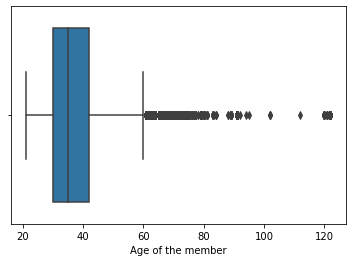

In [5]:
# I would consider the Outliers from maybe 95 yers and above.
sb.boxplot(data=df, x='age', color=sb.color_palette()[0]);
plt.xlabel('Age of the member');

In [6]:
np.log10(df.age.describe())

count    5.242919
mean     1.570499
std      1.004988
min      1.322219
25%      1.477121
50%      1.544068
75%      1.623249
max      2.086360
Name: age, dtype: float64

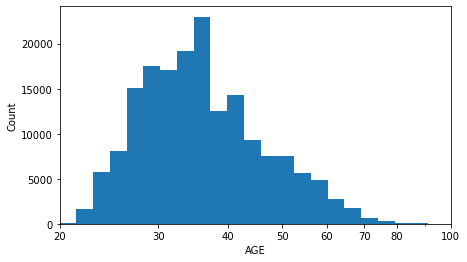

In [7]:
bins = 10 ** np.arange(1, 3.0 + 0.03 ,0.03) 
plt.figure(figsize=[7, 4])
plt.hist(data=df, x='age', bins=bins)
ticks = [20, 30, 40 , 50, 60, 70, 80, 100]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.xlim(20,100)
plt.show();

### which user type is more
>In february 2019, 90.53% of the user types in the Ford GoBikes sharing platform were Subscribers. 9.47% of the user types in the Ford GoBikes Sharing Platform were Customers.

In [8]:
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

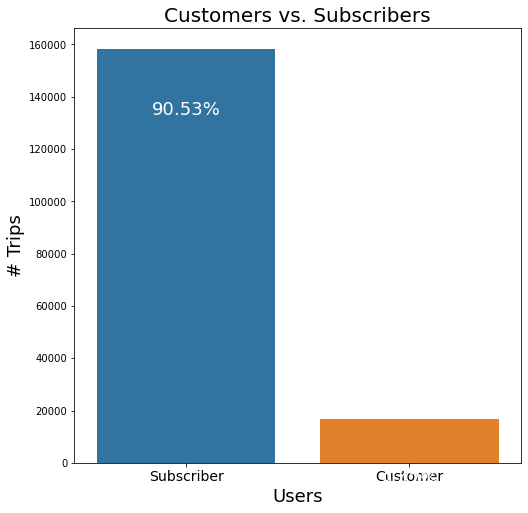

In [9]:
plt.figure(figsize=(8,8))
sb.countplot(data = df, x = "user_type", order = df['user_type'].value_counts().index);
plt.ylabel('# Trips',fontsize = 18)
plt.xlabel('Users',fontsize = 18)
plt.title('Customers vs. Subscribers',fontsize = 20)
plt.xticks(size=14);
plt.text(0, subscriber-20000,str(round(subscriber_prop*100,2))+'%', ha = 'center',va = 'top', color = 'white',fontsize = 18)
plt.text(1, customer-20000,str(round(customer_prop*100,2))+'%', ha = 'center',va = 'top', color = 'white',fontsize = 18);

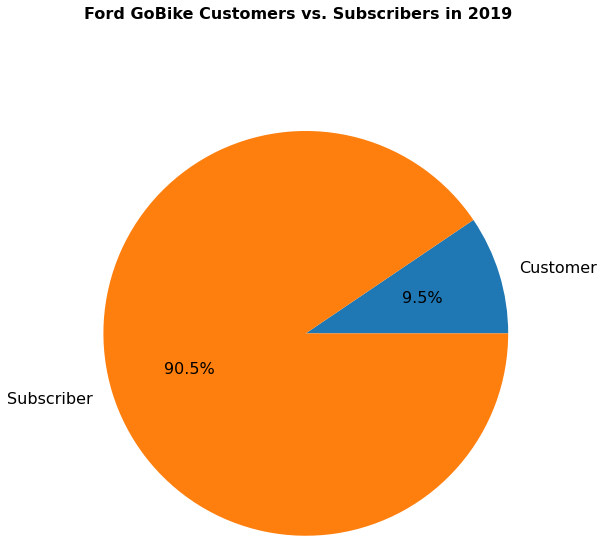

In [10]:
plt.figure(figsize = [8, 8])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
plt.pie(size, labels = labels, autopct='%1.1f%%', textprops={'color':'black','size':16})
plt.axis('equal')
plt.suptitle('Ford GoBike Customers vs. Subscribers in 2019', y=1.07,
             fontsize=16, fontweight='bold');

### AGE and Trip Duration

>In comparing the Age with Trip Duration from the below figures, we have an inverse relationship between the two variable. duration trip decreases in general as age increses as excpected.

In [11]:
numeric_vars = ['duration_sec', 'age']

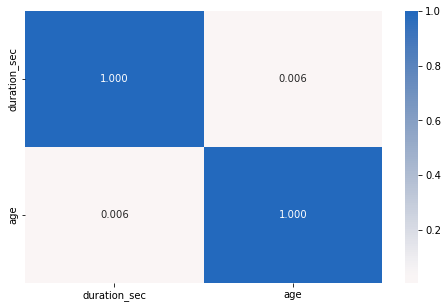

In [12]:
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

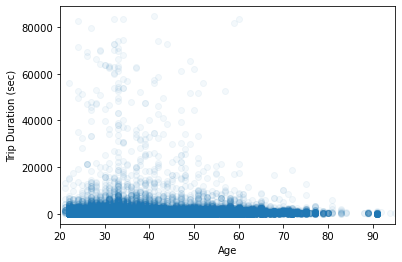

In [13]:
# a scatter plot.
plt.scatter(data=df, x='age', y='duration_sec', alpha=1/20)
plt.xlim(20, 95) ## for better and focused result.
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)');

##### Looking at the Member gender.
- Male seem to the higher trip duration, but this need to be investigated more. (propration)

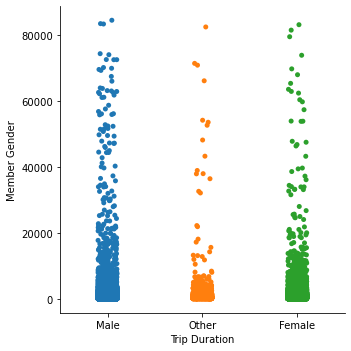

In [14]:
sb.catplot(x="member_gender", y="duration_sec", data=df)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

C:\Users\sadeeq\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


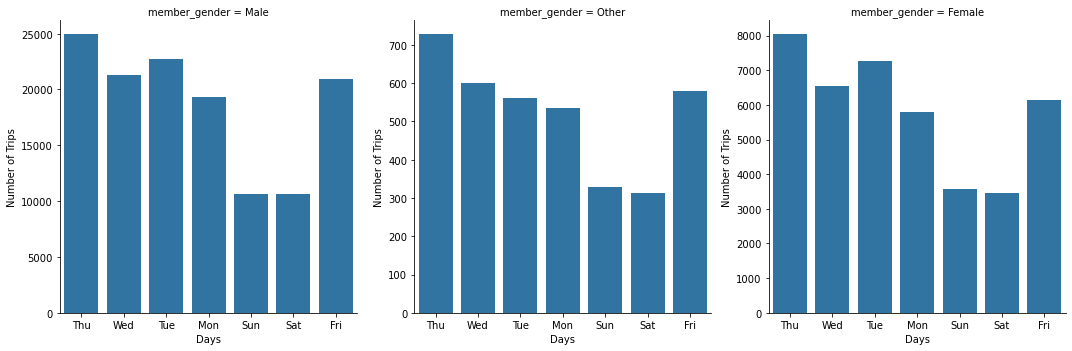

In [15]:
g = sb.FacetGrid(data=df,col='member_gender', col_wrap = 3, height = 5, sharey=False)
g.map(sb.countplot, 'trip_day')

for i in range(3):
    g.axes[i].set_xlabel('Days')
    g.axes[i].set_ylabel('Number of Trips')

plt.show();

##### User Type with member gender

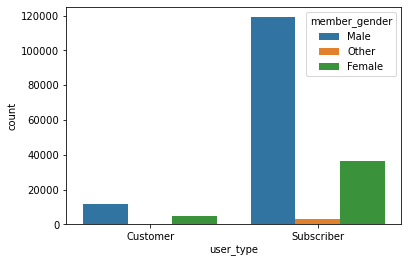

In [16]:
sb.countplot(data=df, x='user_type', hue='member_gender');

#### Days and hours with user type
This is a good oppertinity to create heatmap.
Looking at the heatmap the subscriber is far less active than the customer which was a surprise to me.

In [17]:
df_sub = df.query('user_type == "Subscriber"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index()
df_cus = df.query('user_type == "Customer"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index()

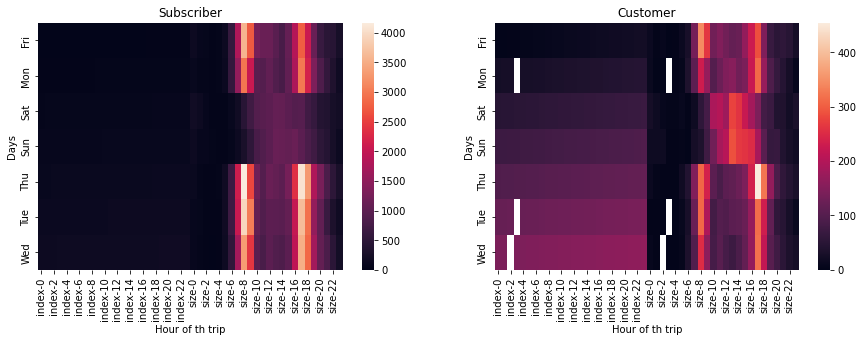

In [18]:
plt.figure(figsize = [15, 10]) # larger figure size for subplots


plt.subplot(2,2,1)
sb.heatmap(df_sub.pivot('trip_day','trip_hour'))
plt.title('Subscriber')
plt.ylabel('Days')
plt.xlabel('Hour of th trip')

plt.subplot(2,2,2) 
sb.heatmap(df_cus.pivot('trip_day','trip_hour'))
plt.title('Customer')
plt.ylabel('Days')
plt.xlabel('Hour of th trip');

In [22]:
!jupyter nbconvert part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 814914 bytes to part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\sadeeq\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\sadeeq\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\sadeeq\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\sadeeq\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\sadeeq\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  F